# DS 301 Lab - 2
# Classification

A large portion of the code & theory has been taken from the book - 
Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems by A. Geron

### Instructions - <br>
1. Please go over the sample code shown below and use it as reference for your class project <br>
2. Perform classification on the credit risk dataset to ascertain whether a particular person would be deemed to have a good/bad credit rating <br>
3. The dataset can be downloaded from here - https://storage.googleapis.com/kaggle-forum-message-attachments/237294/7771/german_credit_data.csv <br>
4. We expect you to use any three of these classifiers - <br>
    4.1 Naive Bayes Algorithm <br>
    4.2 Decision Tree Algorithm <br>
    4.3 KNN <br>
    4.4 LogisticRegression <br>
    4.5 SGD <br>
5. In order to evaluate these classifiers, please show - <br>
    5.1 Cross Validation Score <br>
    5.2 Confusion Matrix <br>
    5.3 Precision Score <br>
    5.4 Recall Score <br>
    5.5 F1 Score <br>
6. Try to improve your model accuracy by performing Feature Engineering and Tuning your parameters <br>
    6.1 Try to add each of the categorical features to the model, by One-hot encoding <br>
    6.2 try remove some of your numerical feature that has a low correlation coefficient <br>
    6.3 Re-evaluate your model on step 5 <br>
    

    
    
    
    

## MNIST Dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

#### Array Shapes

In [2]:
X, y = mnist["data"], mnist["target"] 
print("X.shape=",X.shape)
print("y.shape=",y.shape)

X.shape= (70000, 784)
y.shape= (70000,)


#### Plotting an image from within the dataset

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[0]

<Figure size 640x480 with 1 Axes>

'5'

#### Converting the label from string to integer

In [4]:
y = y.astype(np.uint8)

#### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

#### Training a SGDClassifier

In [6]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

#### 1. Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") 

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
            pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) 
        
    

In [11]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") 

array([0.91125, 0.90855, 0.90915])

#### 2. Confusion Matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### 3. Precision and Recall

In [14]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score =",precision_score(y_train_5, y_train_pred))
print("Recall Score =",recall_score(y_train_5, y_train_pred))


Precision Score = 0.8370879772350012
Recall Score = 0.6511713705958311


#### F1 Score

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.7325171197343846

#### Precision/Recall Tradeoff

In [16]:
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores


array([2164.22030239])

In [17]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

##### Increasing the threshold

In [18]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold) 
y_some_digit_pred

array([False])

##### Finding a 'good' threshold

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    

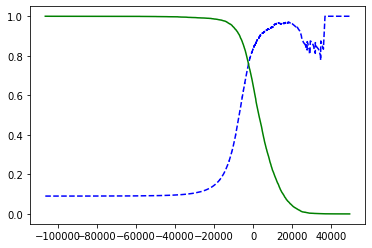

In [21]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#### ROC Curve

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

##### TPR vs FPR

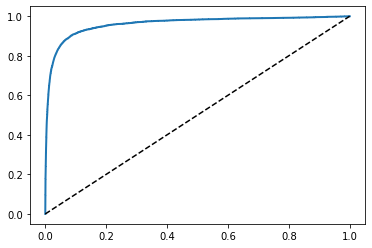

In [23]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
plot_roc_curve(fpr, tpr) 
plt.show()


##### Area Under Curve

In [24]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5, y_scores)


0.9604938554008616

In [46]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("C:/Users/h8438/DS project/DS301-f19/german_credit_data.csv",index_col=0)

In [47]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [48]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [49]:
df_credit=df_credit.dropna()

In [50]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [51]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

Job     0   1    2   3
Sex                   
female  7  41   98  22
male    7  75  215  57


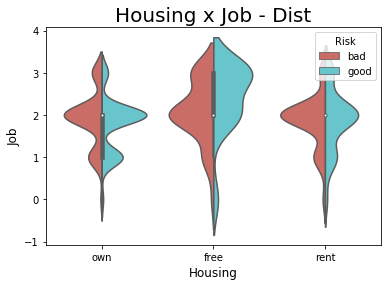

In [53]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()


In [56]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

Purpose :  ['radio/TV' 'furniture/equipment' 'car' 'business' 'domestic appliances'
 'repairs' 'vacation/others' 'education']
Sex :  ['female' 'male']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['little' 'moderate' 'quite rich' 'rich']
Risk :  ['bad' 'good']
Checking account :  ['moderate' 'little' 'rich']
Aget_cat :  [Student, Adult, Young, Senior]
Categories (4, object): [Student < Young < Adult < Senior]


In [57]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [79]:
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

In [87]:
df_credit.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
1,22,2,0.771184,48,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,45,2,0.785793,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,0.760333,24,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,35,3,0.779320,36,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9,28,3,0.764278,30,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [80]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [81]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [82]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.5190839694656488


In [97]:
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


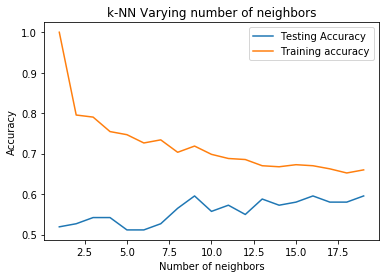

In [98]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy") 

array([0.67175573, 0.59230769, 0.64615385])

In [111]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, y_train_pred)

array([[172,  48],
       [ 94,  77]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score =",precision_score(y_train, y_train_pred))
print("Recall Score =",recall_score(y_train, y_train_pred))


Precision Score = 0.616
Recall Score = 0.4502923976608187


In [113]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred) 

0.5202702702702702